### soft-margin-svm

### 和knn一样，要做数据标准化处理

# scikit-learn中的SVM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

X = X[y<2,:2]
y = y[y<2]

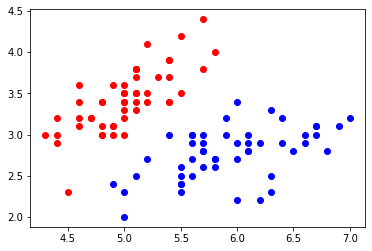

In [3]:
plt.scatter(X[y==0,0], X[y==0,1], color="r")
plt.scatter(X[y==1,0], X[y==1,1], color="b")
plt.show()

In [4]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X)
X_standard = standardScaler.transform(X)

In [5]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C=1e9)
svc.fit(X_standard, y)

LinearSVC(C=1000000000.0)

In [6]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz,cmap=custom_cmap)

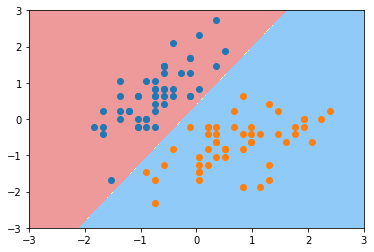

In [7]:
plot_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1])
plt.scatter(X_standard[y==1,0], X_standard[y==1,1])
plt.show()

In [8]:
svc2 = LinearSVC(C=1e-2)
svc2.fit(X_standard, y)

LinearSVC(C=0.01)

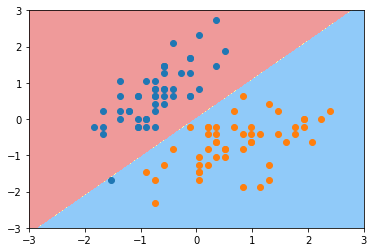

In [9]:
plot_decision_boundary(svc2, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1])
plt.scatter(X_standard[y==1,0], X_standard[y==1,1])
plt.show()

In [10]:
svc.coef_

array([[ 4.03243863, -2.50699678]])

In [11]:
svc.intercept_

array([0.92733619])

In [12]:
def plot_svc_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz,cmap=custom_cmap)
    
    w = model.coef_[0]
    b = model.intercept_[0]
    
    # w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    plot_x = np.linspace(axis[0], axis[1], 200)
    up_y = -w[0]/w[1] * plot_x - b/w[1] + 1/w[1]
    down_y = -w[0]/w[1] * plot_x - b/w[1] - 1/w[1]
    
    up_index = (up_y >= axis[2]) & (up_y <= axis[3])
    down_index = (down_y >= axis[2]) & (down_y <= axis[3])
    plt.plot(plot_x[up_index], up_y[up_index], color='black')
    plt.plot(plot_x[down_index], down_y[down_index], color='black')

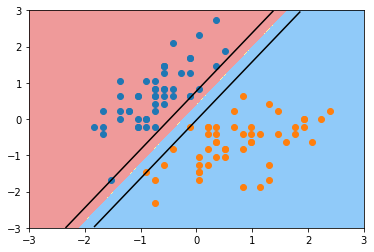

In [13]:
plot_svc_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1])
plt.scatter(X_standard[y==1,0], X_standard[y==1,1])
plt.show()

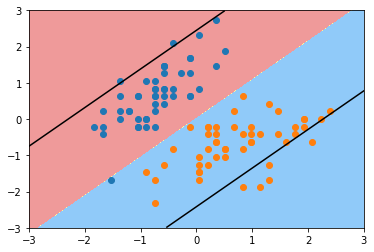

In [14]:
plot_svc_decision_boundary(svc2, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1])
plt.scatter(X_standard[y==1,0], X_standard[y==1,1])
plt.show()

# svm中使用多项式特征

In [15]:
X, y = datasets.make_moons()

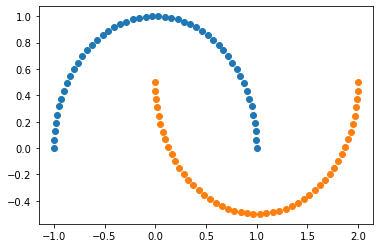

In [16]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

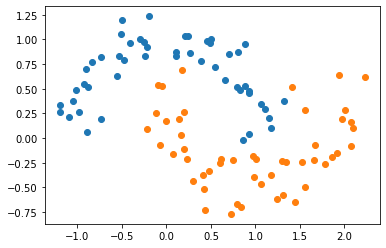

In [17]:
X, y = datasets.make_moons(noise=0.15, random_state=666)

plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

### 使用多项式特征的SVM

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [19]:
def PolynomialSVC(degree, C=1.0):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("linearSVC", LinearSVC(C=C))
    ])

In [20]:
poly_svc_3 = PolynomialSVC(degree=3)
poly_svc_3.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('std_scaler', StandardScaler()), ('linearSVC', LinearSVC())])

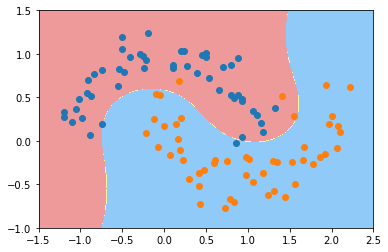

In [21]:
plot_decision_boundary(poly_svc_3, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

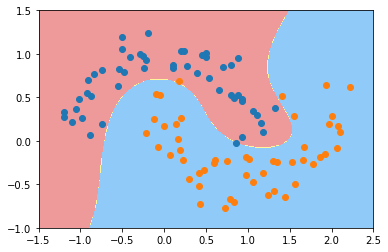

In [22]:
poly_svc_5 = PolynomialSVC(degree=5)
poly_svc_5.fit(X, y)
plot_decision_boundary(poly_svc_5, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

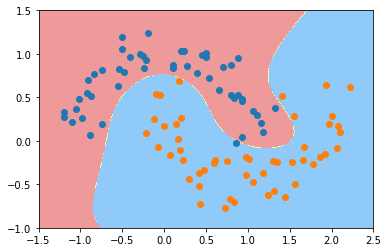

In [23]:
poly_svc_10 = PolynomialSVC(degree=10)
poly_svc_10.fit(X, y)
plot_decision_boundary(poly_svc_10, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

### 使用多项式核函数的SVM

In [24]:
from sklearn.svm import SVC

def PolynomialKernelSVC(degree, C=1.0):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        ("kernelSVC", SVC(kernel="poly", degree=degree, C=C))
    ])

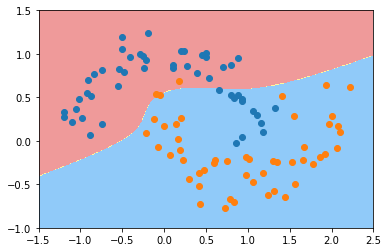

In [25]:
poly_kernel_svc_3 = PolynomialKernelSVC(degree=3)
poly_kernel_svc_3.fit(X, y)

plot_decision_boundary(poly_kernel_svc_3, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

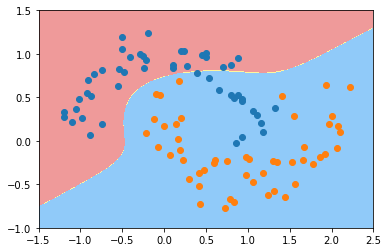

In [26]:
poly_kernel_svc_7 = PolynomialKernelSVC(degree=7)
poly_kernel_svc_7.fit(X, y)

plot_decision_boundary(poly_kernel_svc_7, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

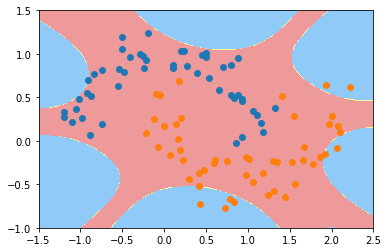

In [27]:
poly_kernel_svc_10 = PolynomialKernelSVC(degree=10)
poly_kernel_svc_10.fit(X, y)

plot_decision_boundary(poly_kernel_svc_10, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

# 直观理解高斯核函数

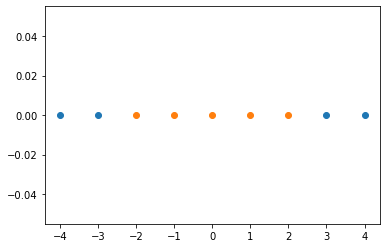

In [28]:
x = np.arange(-4, 5, 1)
y = np.array((x >= -2) & (x <= 2), dtype='int')
plt.scatter(x[y==0], [0]*len(x[y==0]))
plt.scatter(x[y==1], [0]*len(x[y==1]))
plt.show()

In [29]:
def gaussian(x, l):
    gamma = 1.0
    return np.exp(-gamma * (x - l)**2)

In [35]:
l1, l2 = -1, 1

x_new = np.empty((len(x), 2))
for i, data in enumerate(x):
    x_new[i, 0] = gaussian(data, l1)
    x_new[i, 1] = gaussian(data, l2)

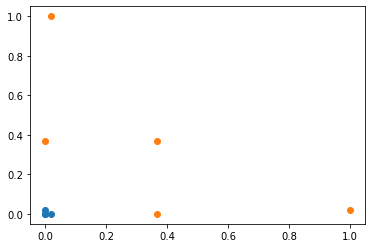

In [36]:
plt.scatter(x_new[y==0,0], x_new[y==0,1])
plt.scatter(x_new[y==1,0], x_new[y==1,1])
plt.show()

# scikit-learn中的高斯核函数

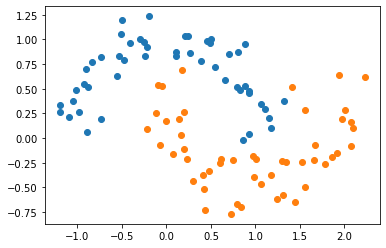

In [37]:
X, y = datasets.make_moons(noise=0.15, random_state=666)

plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [38]:
def RBFKernelSVC(gamma=1.0):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        ("svc", SVC(kernel="rbf", gamma=gamma))
    ])

In [39]:
svc = RBFKernelSVC()
svc.fit(X, y)

Pipeline(steps=[('std_scaler', StandardScaler()), ('svc', SVC(gamma=1.0))])

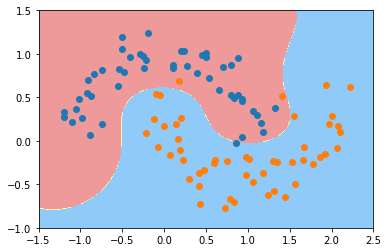

In [40]:
plot_decision_boundary(svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

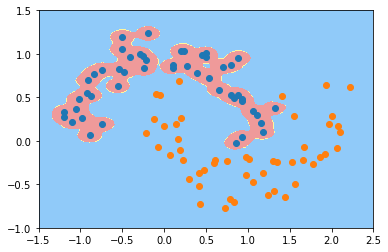

In [41]:
svc_100 = RBFKernelSVC(gamma=100)
svc_100.fit(X, y)
plot_decision_boundary(svc_100, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

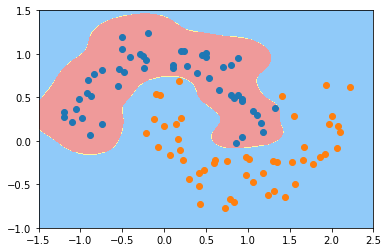

In [42]:
svc_10 = RBFKernelSVC(gamma=10)
svc_10.fit(X, y)
plot_decision_boundary(svc_10, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

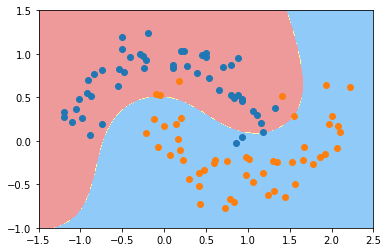

In [43]:
svc_05 = RBFKernelSVC(gamma=0.5)
svc_05.fit(X, y)
plot_decision_boundary(svc_05, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

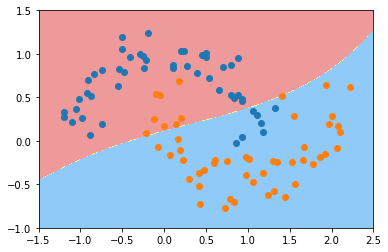

In [44]:
svc_01 = RBFKernelSVC(gamma=0.1)
svc_01.fit(X, y)
plot_decision_boundary(svc_01, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

# svm思想解决回归问题

In [45]:
boston = datasets.load_boston()
X = boston.data
y = boston.target

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [47]:
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def StandardLinearSVR(epsilon=0.1):
    return Pipeline([
        ('std_scaler', StandardScaler()),
        ('linearSVR', LinearSVR(epsilon=epsilon))
    ])

In [48]:
svr = StandardLinearSVR()
svr.fit(X_train, y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('linearSVR', LinearSVR(epsilon=0.1))])

In [49]:
svr.score(X_test, y_test)

0.635408096921809